In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from scipy import stats

## PART 1: Attack(DDOS)/ Benign        

### Loading the Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.shape

(225745, 85)

In [5]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,2.257410e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000,225745.0,225745.0,225745.0,225745.000000,225745.000000,2.257450e+05,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.0,225745.0,225745.0,225745.0,225745.0,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,2735.585147,16.718776,890.536849,1230.172938,inf,inf,1.580587e+06,4.248569e+06,1.348977e+07,2.811855e+04,1.539652e+07,2.540610e+06,5.195207e+06,1.299434e+07,2.073698e+05,6.564701e+06,9.476322e+05,1.610306e+06,4.567514e+06,2.257817e+05,0.033223,0.0,0.0,0.0,111.522718,106.789023,1.261508e+04,1.641693e+03,8.072595,3226.045339,515.002137,1085.593207,2.789906e+06,0.002671,0.033223,0.000120,0.351162,0.504463,0.140752,0.0,0.000120,1.005821,574.568843,164.826715,890.536849,111.522718,0.0,0.0,0.0,0.0,0.0,0.0,4.874916,939.463346,4.572775,5.960477e+03,4247.436922,601.048635,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,3705.123460,50.480568,1120.324921,1733.201267,NaN,NaN,2.701596e+06,7.622819e+06,2.670172e+07,7.598100e+05,3.160826e+07,5.934694e+06,1.078635e+07,2.748870e+07,3.795228e+06,2.198455e+07,4.586374e+06,5.475778e+06,1.617865e+07,4.019290e+06,0.179220,0.0,0.0,0.0,375.790727,511.765795,1.106701e+05,1.989593e+04,15.767713,3813.134850,559.064495,1269.558714,4.115941e+06,0.051614,0.179220,0.010936,0.477334,0.499981,0.347766,0.0,0.010936,1.430781,626.096202,504.892965,1120.324921,375.790727,0.0,0.0,0.0,0.0,0.0,0.0,15.422874,3249.403484,21.755356,3.921834e+04,8037.781019,4319.720339,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

### Initial Data Analysis

1. Confirming target data balance. Benign and Attack have around 40:60 ratio
2. Visualizing attack timeline, attack happened for 20 minutes. During attack proportion DDoS attack far outweigh benign, as expected of DDoS attack


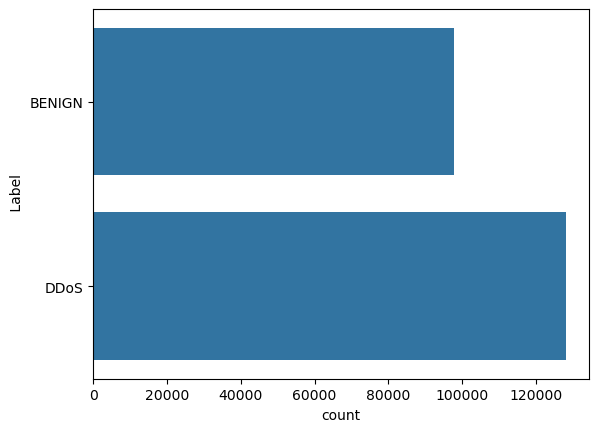

In [7]:
sns.countplot(df[' Label'])
plt.show()

In [5]:
df.columns = df.columns.str.strip()  # Remove leading and trailing spaces|

### Attack Timeline

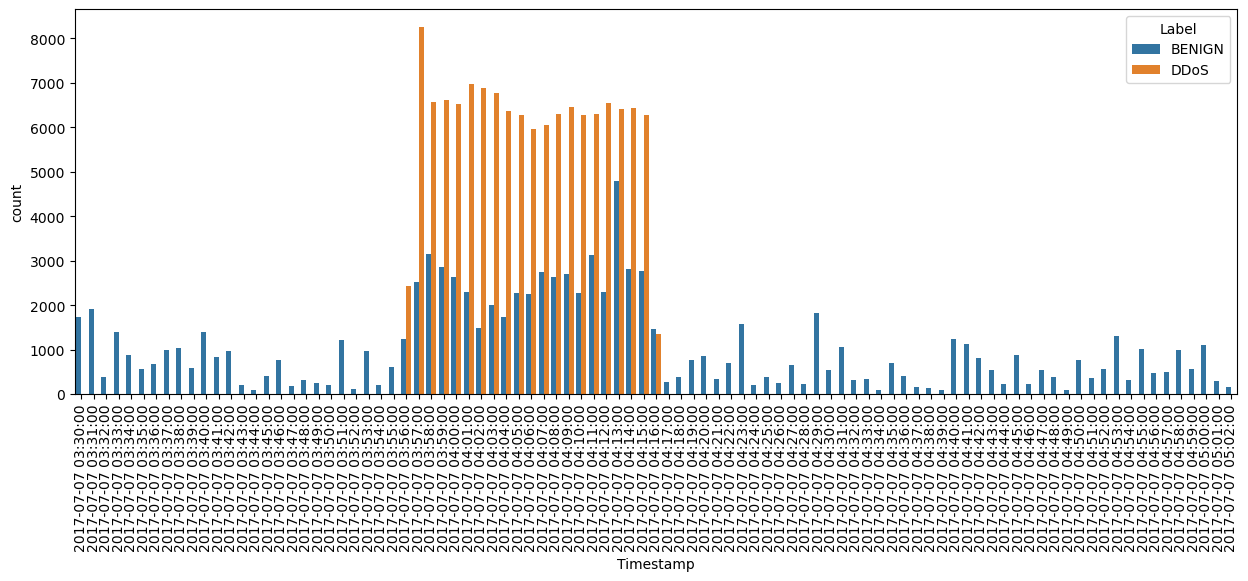

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(15,5))
sns.countplot(df,x='Timestamp', hue='Label')
plt.xticks(rotation=90)
plt.show()

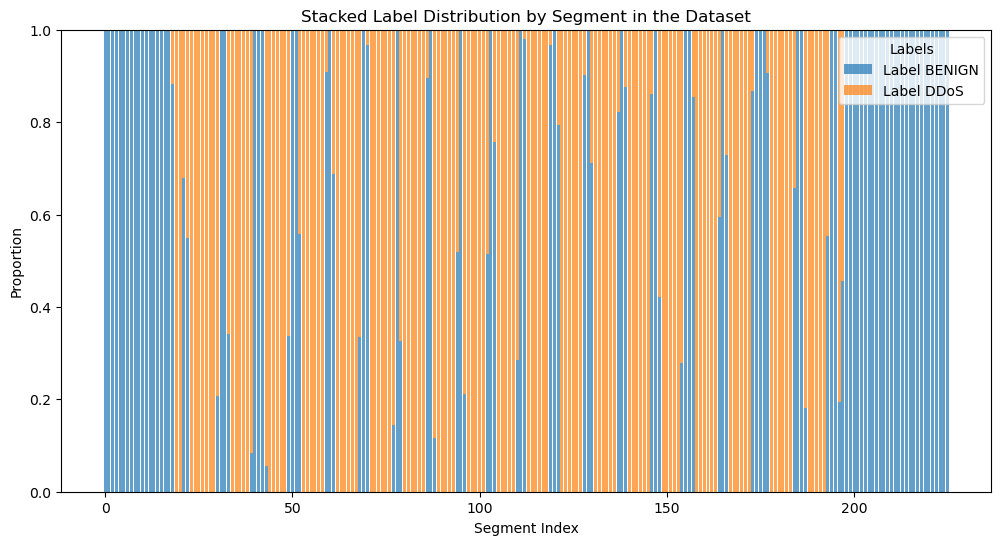

In [10]:
# Define the size of each segment
segment_size = 1000

# Calculate the total number of segments
num_segments = len(df) // segment_size

# Create an empty DataFrame to store label distribution for each segment
label_distribution = pd.DataFrame()

# Calculate the label proportion for each segment
for i in range(num_segments):
    segment = df['Label'][i * segment_size: (i + 1) * segment_size]
    segment_counts = segment.value_counts(normalize=True)  # Calculate proportion
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Handle remaining data by adding an extra segment if necessary
if len(df) % segment_size != 0:
    segment = df['Label'][num_segments * segment_size:]
    segment_counts = segment.value_counts(normalize=True)
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Fill NaN values with 0 to indicate that the label is absent in that segment
label_distribution = label_distribution.fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None  # Initial value for bottom parameter in stacked bar
for label in label_distribution.columns:
    plt.bar(label_distribution.index, label_distribution[label], label=f'Label {label}', bottom=bottom, alpha=0.7)
    bottom = (bottom + label_distribution[label]) if bottom is not None else label_distribution[label]

plt.xlabel('Segment Index')
plt.ylabel('Proportion')
plt.title('Stacked Label Distribution by Segment in the Dataset')
plt.legend(title='Labels')
plt.show()

### Analyzing features

1. Checking for columns without data variation. These columns do not help in classifying attack
2. As most of the columns are numerical, some are actually boolean/categorical. Identifying such columns by evaluating number of unique values

In [7]:
# Checking possible columns that are categorical
categorical_df = []
df_one_values = []
for x in df.columns:
    count = df[x].value_counts().count()
    if count < 20:
        print(f"{x}\t: {count}")
        categorical_df.append(x)
        if count == 1:
            df_one_values.append(x)

Protocol	: 3
Fwd PSH Flags	: 2
Bwd PSH Flags	: 1
Fwd URG Flags	: 1
Bwd URG Flags	: 1
FIN Flag Count	: 2
SYN Flag Count	: 2
RST Flag Count	: 2
PSH Flag Count	: 2
ACK Flag Count	: 2
URG Flag Count	: 2
CWE Flag Count	: 1
ECE Flag Count	: 2
Down/Up Ratio	: 8
Fwd Avg Bytes/Bulk	: 1
Fwd Avg Packets/Bulk	: 1
Fwd Avg Bulk Rate	: 1
Bwd Avg Bytes/Bulk	: 1
Bwd Avg Packets/Bulk	: 1
Bwd Avg Bulk Rate	: 1
min_seg_size_forward	: 8
Label	: 2


In [8]:
# Checking the values of the suspected categorical columns
for x in categorical_df:
    print(df[x].value_counts())
    print()

Protocol
6     192820
17     32871
0         54
Name: count, dtype: int64

Fwd PSH Flags
0    218245
1      7500
Name: count, dtype: int64

Bwd PSH Flags
0    225745
Name: count, dtype: int64

Fwd URG Flags
0    225745
Name: count, dtype: int64

Bwd URG Flags
0    225745
Name: count, dtype: int64

FIN Flag Count
0    225142
1       603
Name: count, dtype: int64

SYN Flag Count
0    218245
1      7500
Name: count, dtype: int64

RST Flag Count
0    225718
1        27
Name: count, dtype: int64

PSH Flag Count
0    146472
1     79273
Name: count, dtype: int64

ACK Flag Count
1    113880
0    111865
Name: count, dtype: int64

URG Flag Count
0    193971
1     31774
Name: count, dtype: int64

CWE Flag Count
0    225745
Name: count, dtype: int64

ECE Flag Count
0    225718
1        27
Name: count, dtype: int64

Down/Up Ratio
0    97309
1    88989
2    21669
5     9989
6     6213
3      745
7      650
4      181
Name: count, dtype: int64

Fwd Avg Bytes/Bulk
0    225745
Name: count, dtype: int64

### Data cleanup for analysis

1. Dropping features that may not be useful based on know-how
2. Dropping any rows with nulls or infinity
3. Dropping columns that does not have any information variety (only contain 1 constant value)
4. Changing categorical/boolean columns from previously being numerical, to ease preprocessing later


In [9]:
df1_analyze = df.drop(columns=['Source Port', 'Destination Port', 'Destination IP', 'Source IP', 'Flow ID', 'Fwd Header Length.1', 'Timestamp'])

# Drop any rows with nulls
print(f"Dropping {df1_analyze.isnull().any(axis=1).sum()} rows with null value...")
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isnull().any(axis=1)].index)

# Drop any rows with infinity
print(f"Dropping {df1_analyze.isnull().any(axis=1).sum()} rows with infinity value...")
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isin([np.inf, -np.inf]).any(axis=1)].index)

# Dropping columns with only 1 value
print(f"Dropping {len(df_one_values)} columns with only 1 value...")
df1_analyze = df1_analyze.drop(columns=df_one_values)

# Change flag columns to boolean type
to_bool = []
for x in df1_analyze.columns:
    if "Flag" in x:
        to_bool.append(x)
print(f"Changing {len(to_bool)} columns to boolean...")
df1_analyze[to_bool] = df1_analyze[to_bool].astype('bool')

# Encode Protocol become categorical
print("Changing Protocol value to categorical with one hot encoding")
df1_analyze = pd.get_dummies(df1_analyze, columns=['Protocol'])


# Changing Label to Benign = 0 and DDoS = 1
df1_analyze['Label'] = df1_analyze['Label'].apply(lambda x: 1 if x == "DDoS" else 0)
df1_analyze['Label'] = df1_analyze['Label'].astype('bool')

Dropping 4 rows with null value...
Dropping 0 rows with infinity value...
Dropping 10 columns with only 1 value...
Changing 8 columns to boolean...
Changing Protocol value to categorical with one hot encoding


### First Numerical Column Analysis

1. Normalizing values with min max scaler, preserving standard deviation of columns
2. Using Pearson's correlation to detect collinearity
3. Dropping columns that have collinearity based on its variance (Keep columns that has higher variance)


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Making similar values for numerical columns
numerical_columns = df1_analyze.select_dtypes('number').columns
scaler = MinMaxScaler()
df1_analyze[numerical_columns] = scaler.fit_transform(df1_analyze[numerical_columns])

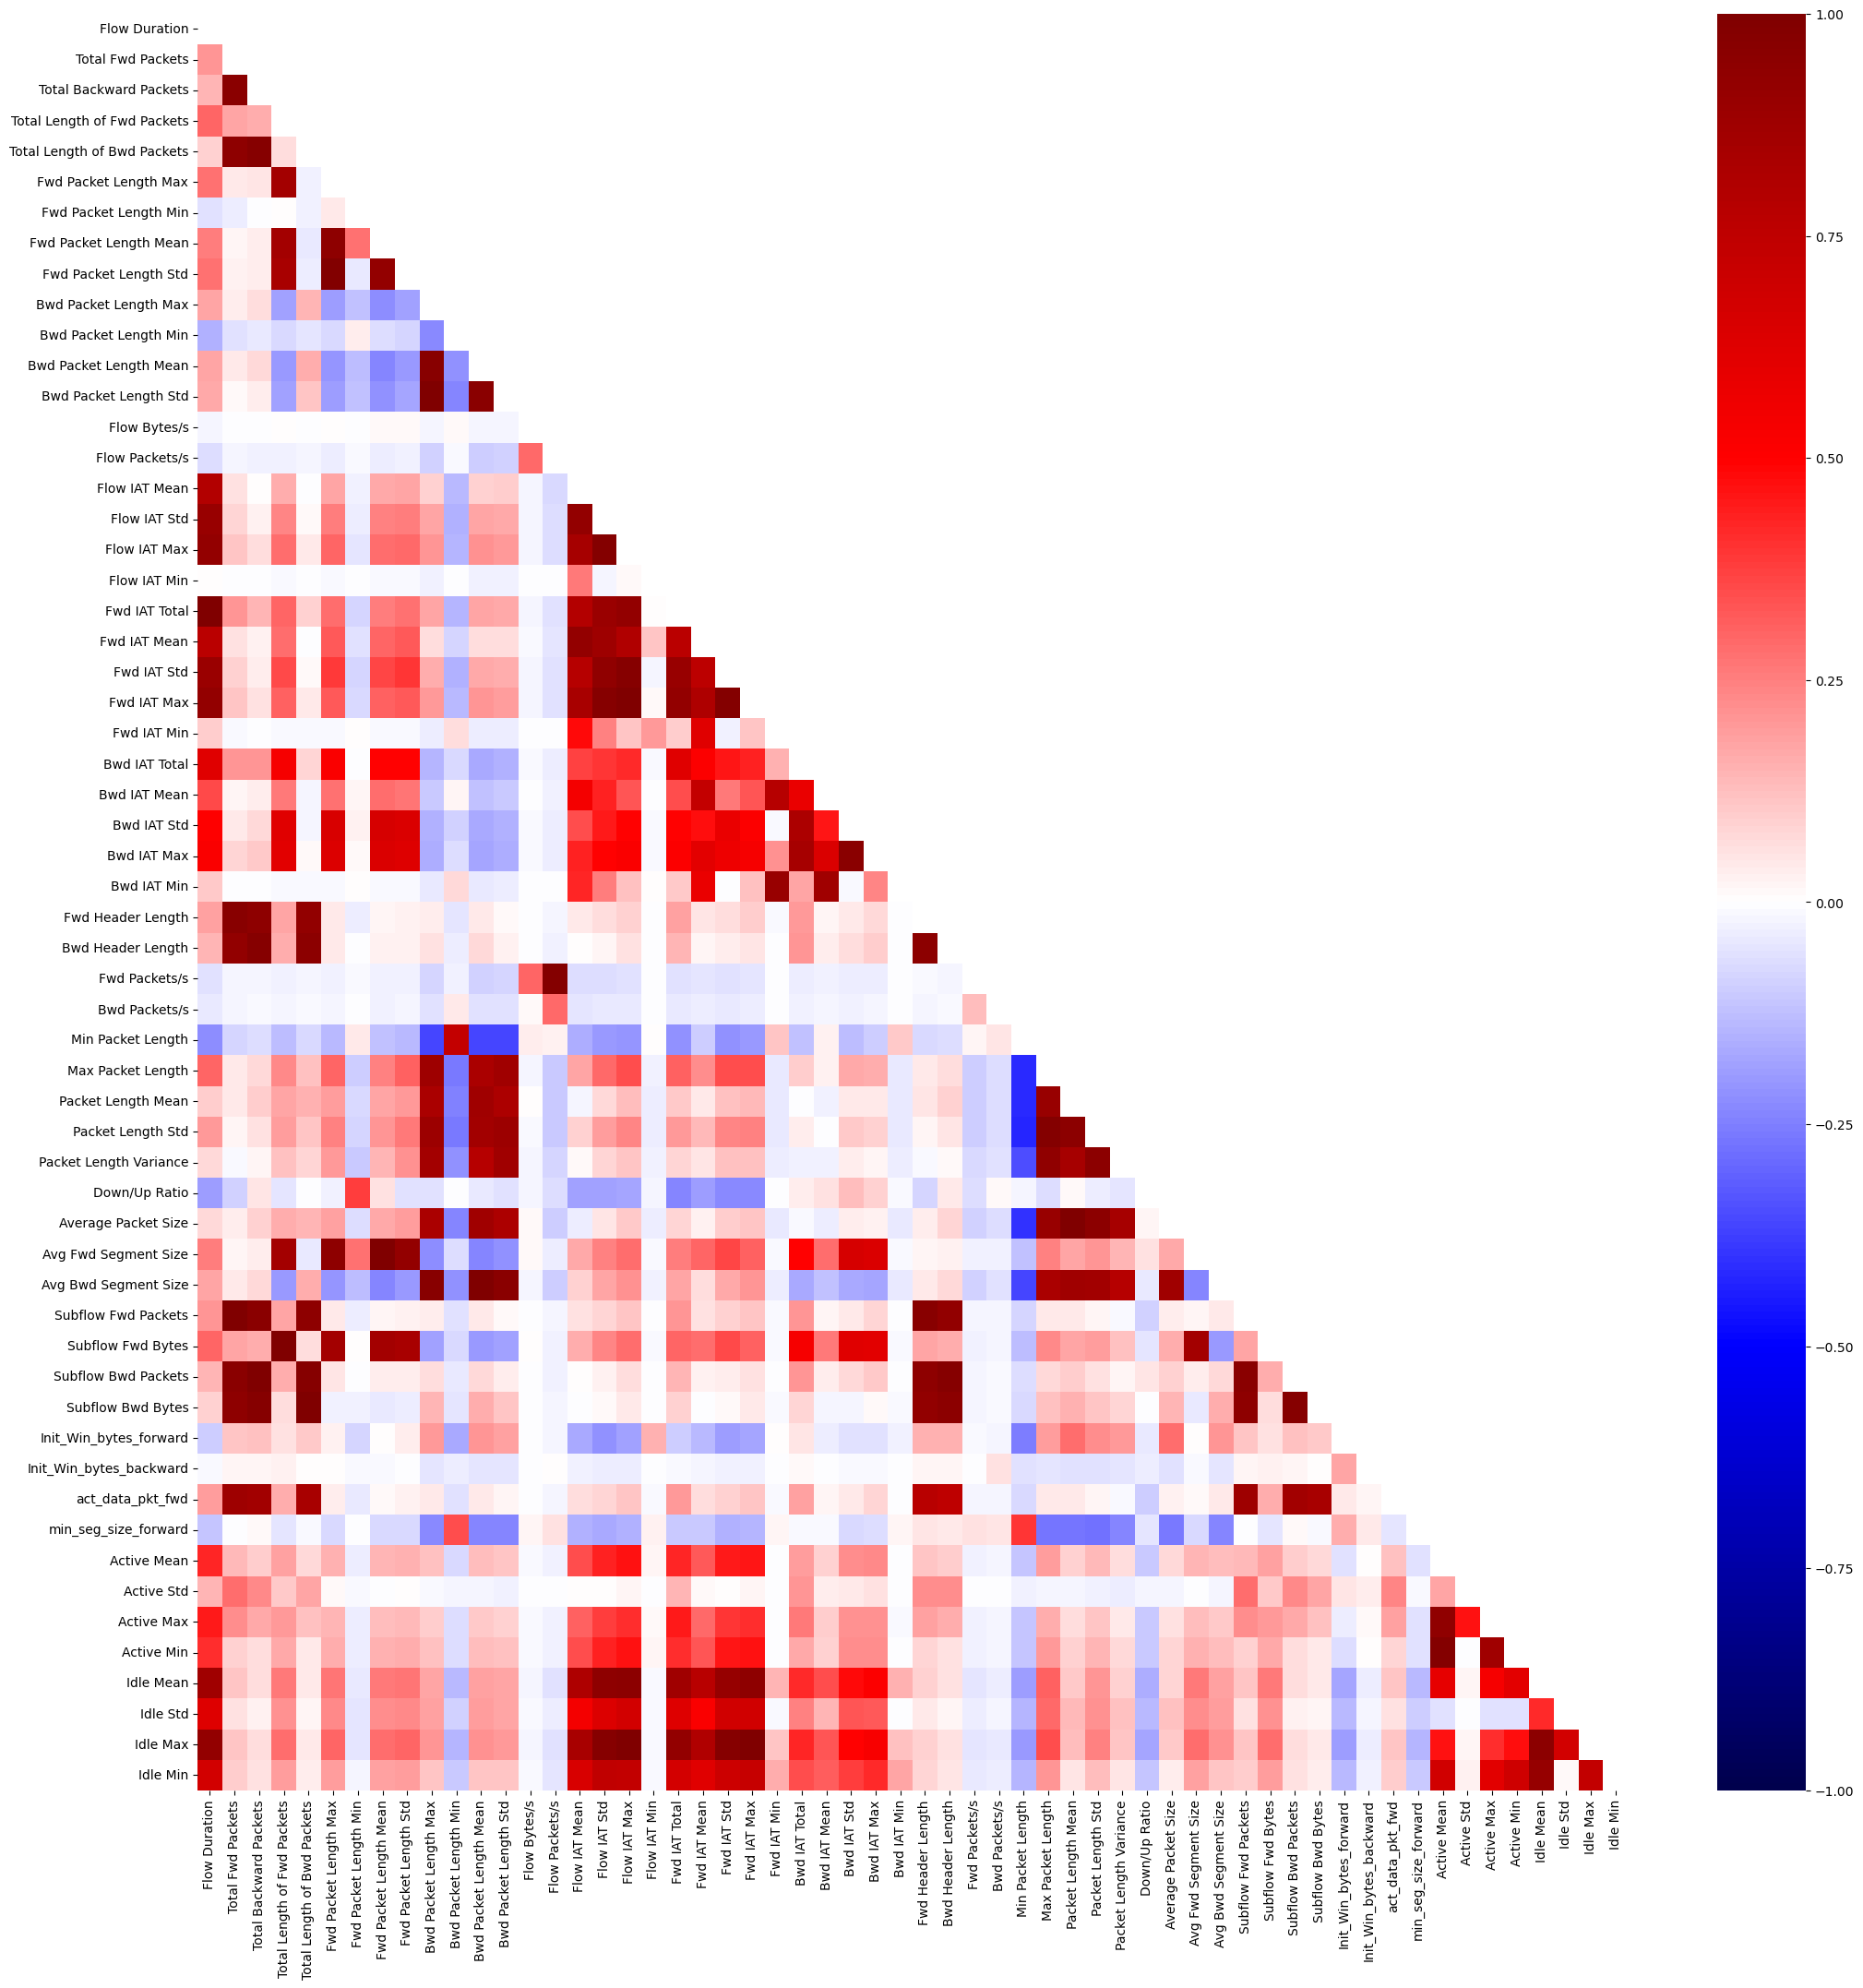

In [12]:
corr = df1_analyze.select_dtypes('number').corr()
mask = np.triu(corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, mask=mask, cmap='seismic', vmax=1, vmin=-1)
plt.show()

In [13]:
iterations = corr.columns
variance = df1_analyze.select_dtypes('number').var()
mask = np.triu(corr)
columns_to_drop = set()
print("High Linear Correlations\n")
for i in range(len(iterations)):
    for j in range(i):
        if abs(corr.iloc[i,j]) >= 0.8:
            print(f"{iterations[i]} v {iterations[j]}: {corr.iloc[i,j]}\n")
            if variance[iterations[i]] > variance[iterations[j]]:
                columns_to_drop.add(iterations[j])
            else:
                columns_to_drop.add(iterations[i])
        else:
            mask[i,j] = 1

print(f"{len(columns_to_drop)} Columns to drop:\n")
print(columns_to_drop)            

High Linear Correlations

Total Backward Packets v Total Fwd Packets: 0.9567136244127207

Total Length of Bwd Packets v Total Fwd Packets: 0.9384697830686014

Total Length of Bwd Packets v Total Backward Packets: 0.9704220582473434

Fwd Packet Length Max v Total Length of Fwd Packets: 0.852425217278092

Fwd Packet Length Mean v Total Length of Fwd Packets: 0.8584367853293069

Fwd Packet Length Mean v Fwd Packet Length Max: 0.940953183923084

Fwd Packet Length Std v Total Length of Fwd Packets: 0.8391376344888932

Fwd Packet Length Std v Fwd Packet Length Max: 0.9916724305462838

Fwd Packet Length Std v Fwd Packet Length Mean: 0.9196308911619563

Bwd Packet Length Mean v Bwd Packet Length Max: 0.9614403503257839

Bwd Packet Length Std v Bwd Packet Length Max: 0.9926829726002745

Bwd Packet Length Std v Bwd Packet Length Mean: 0.956005295562481

Flow IAT Std v Flow Duration: 0.8991755549188583

Flow IAT Std v Flow IAT Mean: 0.9175261684823351

Flow IAT Max v Flow Duration: 0.920254144362

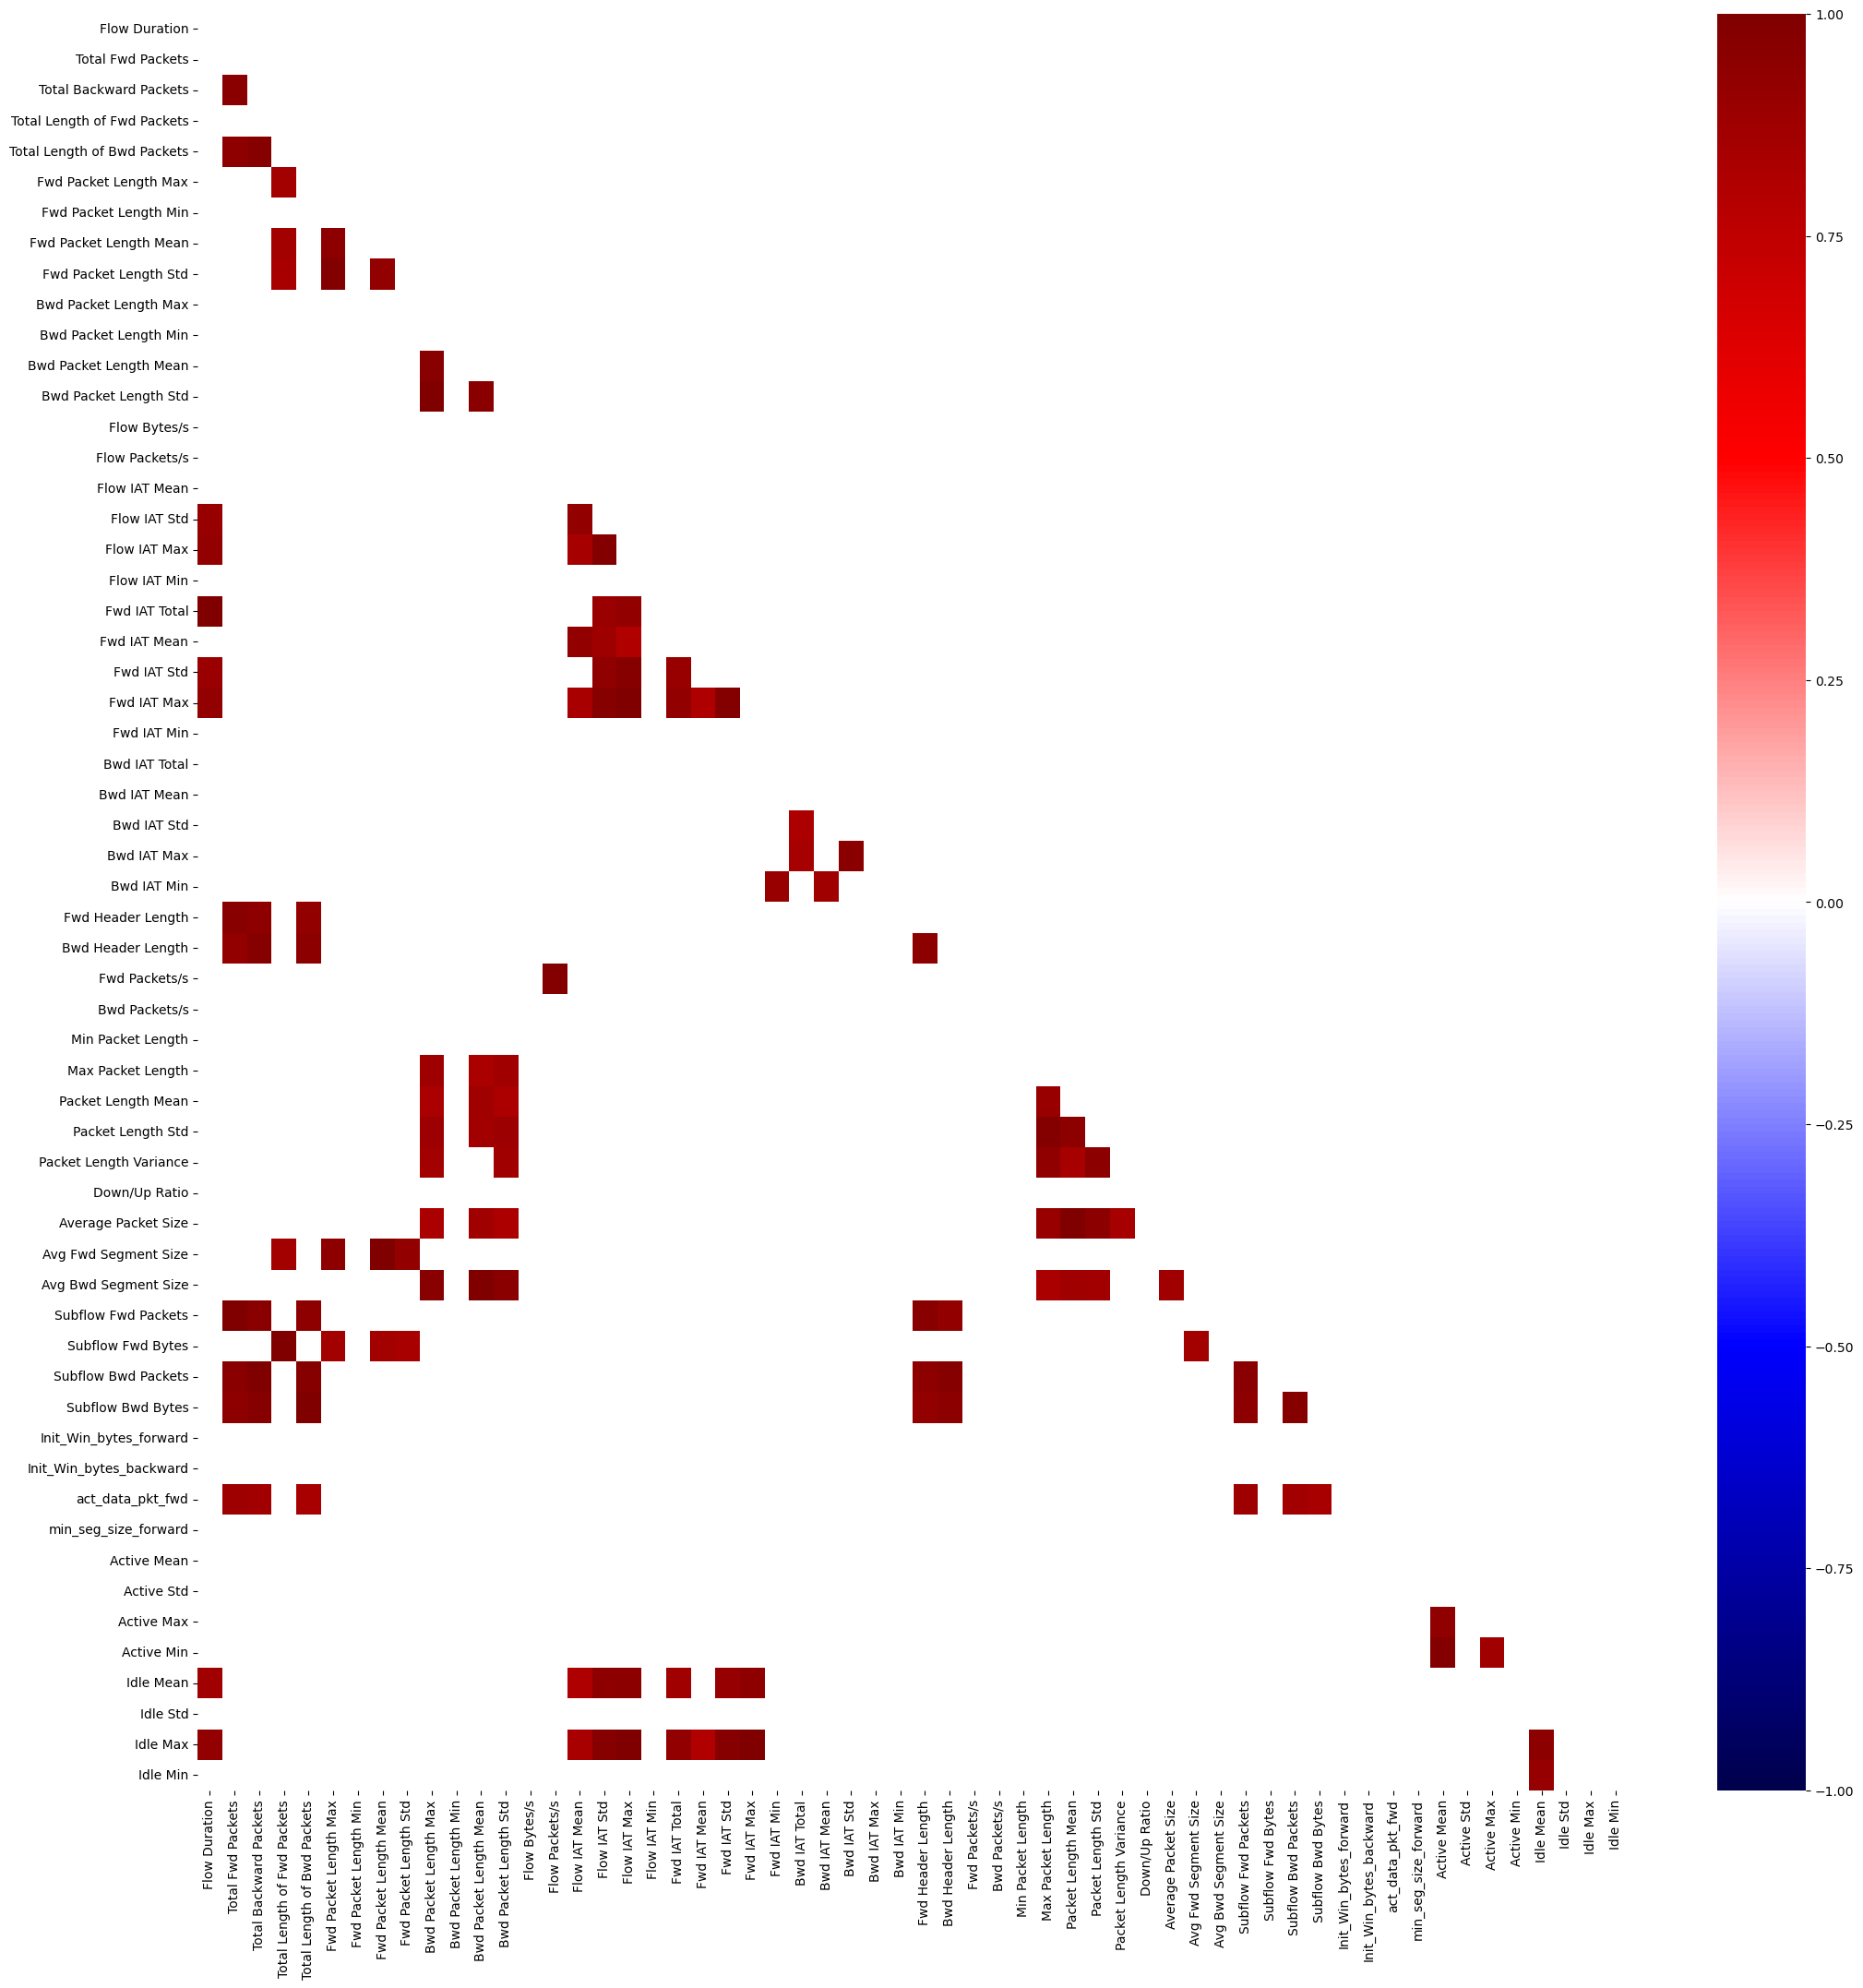

In [14]:
# Correlation above 0.8
plt.figure(figsize=(25,25))
sns.heatmap(corr, mask=mask, cmap='seismic', vmax=1, vmin=-1)
plt.show()

In [15]:
# Dropping columns with high correlation
df1_analyze = df1_analyze.drop(columns=columns_to_drop)

### Second Numerical Feature Analysis

1. Using Point-Biserial correlation, checking features correlation with label. Dropped columns with low correlation
2. 13 numerical columns remained, plot its histogram to have a grasp of their values distribution
3. Make scatterplot to figure out any possible clusters between two features

In [16]:
# Checking Correlation between numerical features with target with Point-Biserial Correlation
print("Low correlation numerical feature with Label\n")
columns_to_drop_2 = []
for x in df1_analyze.select_dtypes('number').columns:
    temp = stats.pointbiserialr(df1_analyze[x], df1_analyze['Label'])
    if abs(temp.statistic) < 0.1:
        print(f"{x}\t: {temp.statistic}")
        columns_to_drop_2.append(x)

print(f"Dropping {len(columns_to_drop_2)} columns...")
df1_analyze = df1_analyze.drop(columns=columns_to_drop_2)

Low correlation numerical feature with Label

Flow Bytes/s	: -0.03554493545691384
Flow IAT Min	: -0.038689705994943244
Fwd IAT Total	: 0.04049423866605317
Fwd Header Length	: -0.043973860151618846
Bwd Packets/s	: -0.090404878718043
Init_Win_bytes_forward	: -0.05097124361890741
Active Std	: -0.07042469740266452
Active Max	: -0.009307613028294127
Idle Std	: 0.0779875818219766
Dropping 9 columns...


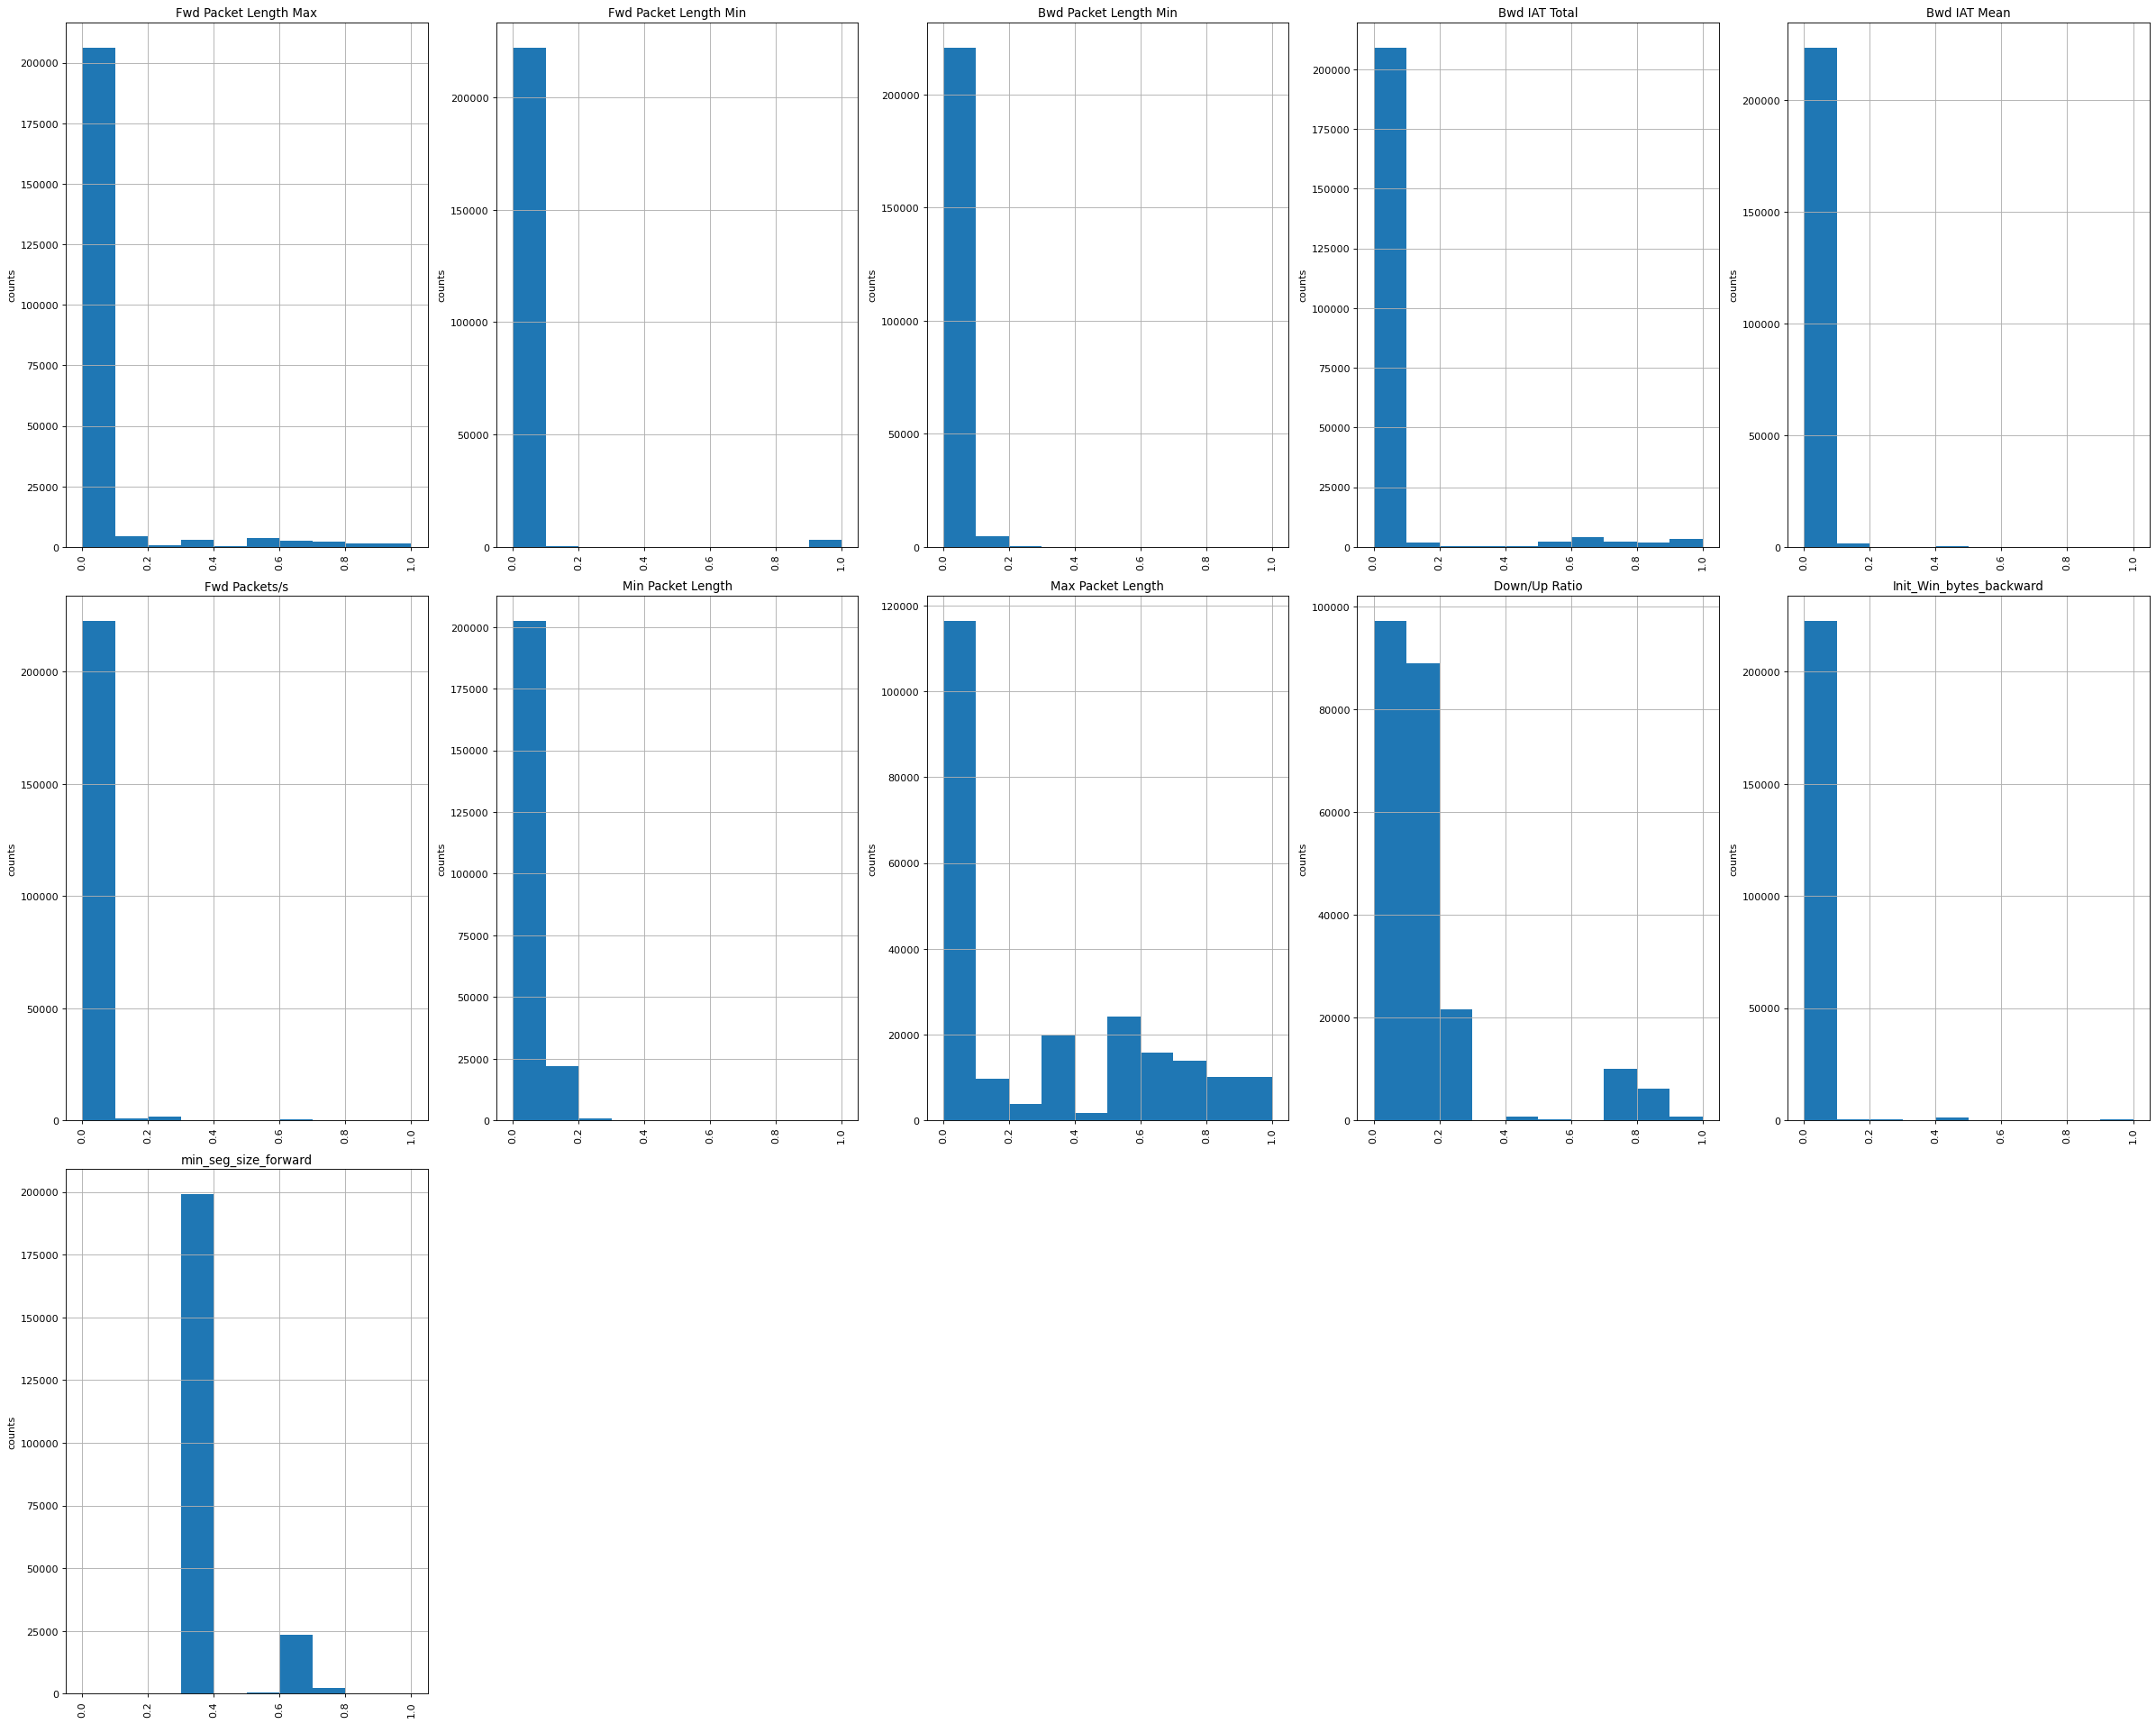

In [47]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    df = df.select_dtypes('number')
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    # Set up the figure size dynamically based on the number of graphs
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]}')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# TODO Adjust parameters
plotPerColumnDistribution(df1_analyze, len(df1_analyze.select_dtypes('number').columns), 5)

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_2928\946745603.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


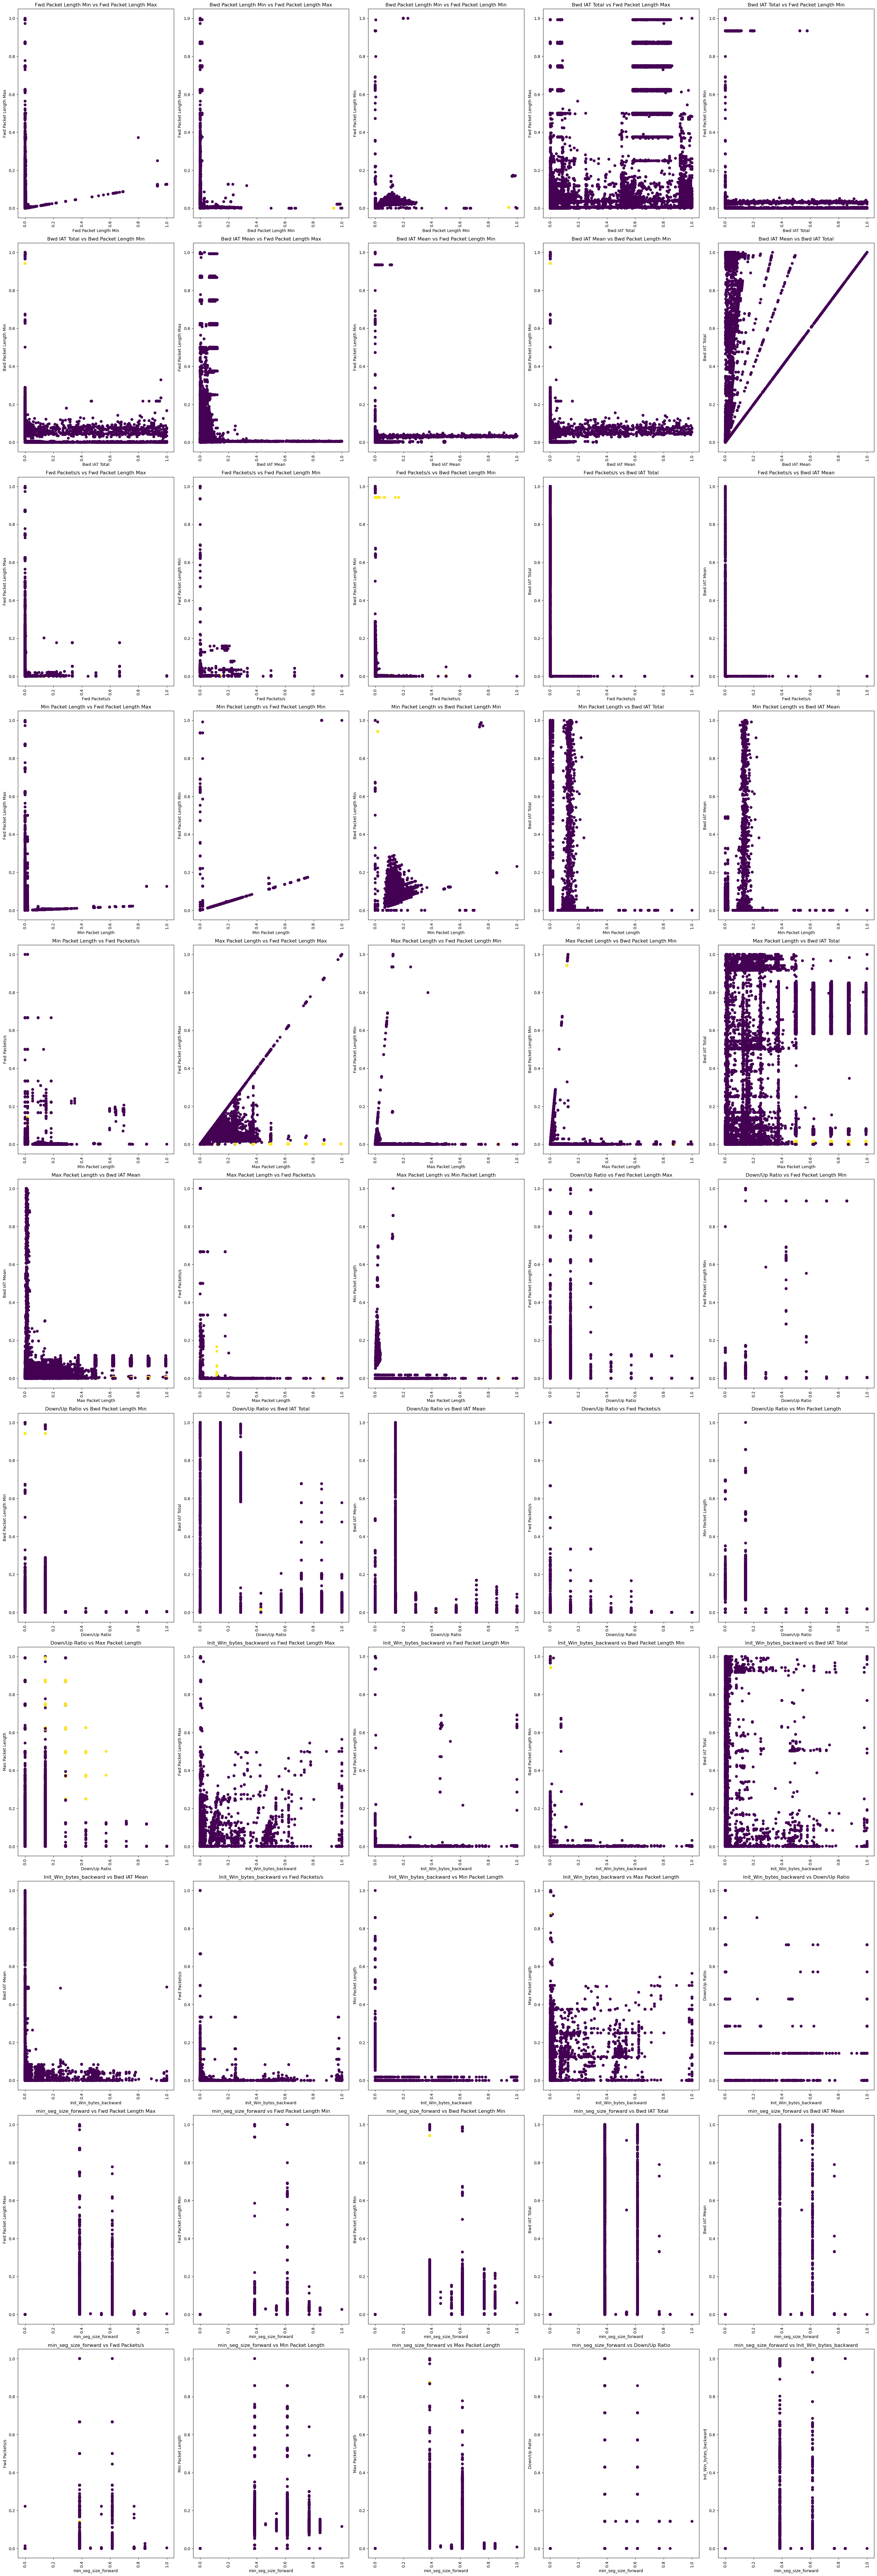

In [48]:
def plotPerColumnScatter(df, nGraphShown, nGraphPerRow):
    columnNames = list(df.select_dtypes('number'))
    nCol = len(columnNames)
    # Ensure nGraphRow is an integer
    nGraphRow = int(round(nGraphShown / nGraphPerRow))

    # Set up the figure size dynamically based on the number of graphs
    # plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow, figsize=(6 * nGraphPerRow, 8 * nGraphRow)) 
    colormap = plt.cm.get_cmap('viridis')
    graph_counter = 0
    for i in range(min(nCol, nGraphShown)):
        for j in range(i):
            row = graph_counter // nGraphPerRow
            col = graph_counter % nGraphPerRow
            ax[row, col].scatter(df[columnNames[i]], df[columnNames[j]], c=df['Label'], cmap=colormap)
            ax[row, col].set_ylabel(f'{columnNames[j]}')
            ax[row, col].set_xlabel(f'{columnNames[i]}')
            ax[row, col].tick_params(axis='x', rotation=90)
            ax[row, col].set_title(f'{columnNames[i]} vs {columnNames[j]}')
            graph_counter += 1
            if graph_counter >= nGraphShown:
                break
        if graph_counter >= nGraphShown:
                break
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

number_of_columns = len(df1_analyze.select_dtypes('number').columns)
plotPerColumnScatter(df1_analyze, int(number_of_columns * (number_of_columns-1) / 2), 5)

### Categorical Columns Analysis

1. Make countplot to see distributions of target values. Some features have very lopsided count, some only have attacks in one side of the count (Protocols)
2. Checking any significant dependency between features and target with chi square test. All features have significant dependency with target (p < 0.05)
3. Checking any mutual information between features and target. Some features have almost no mutual information with target. Dropping those columns

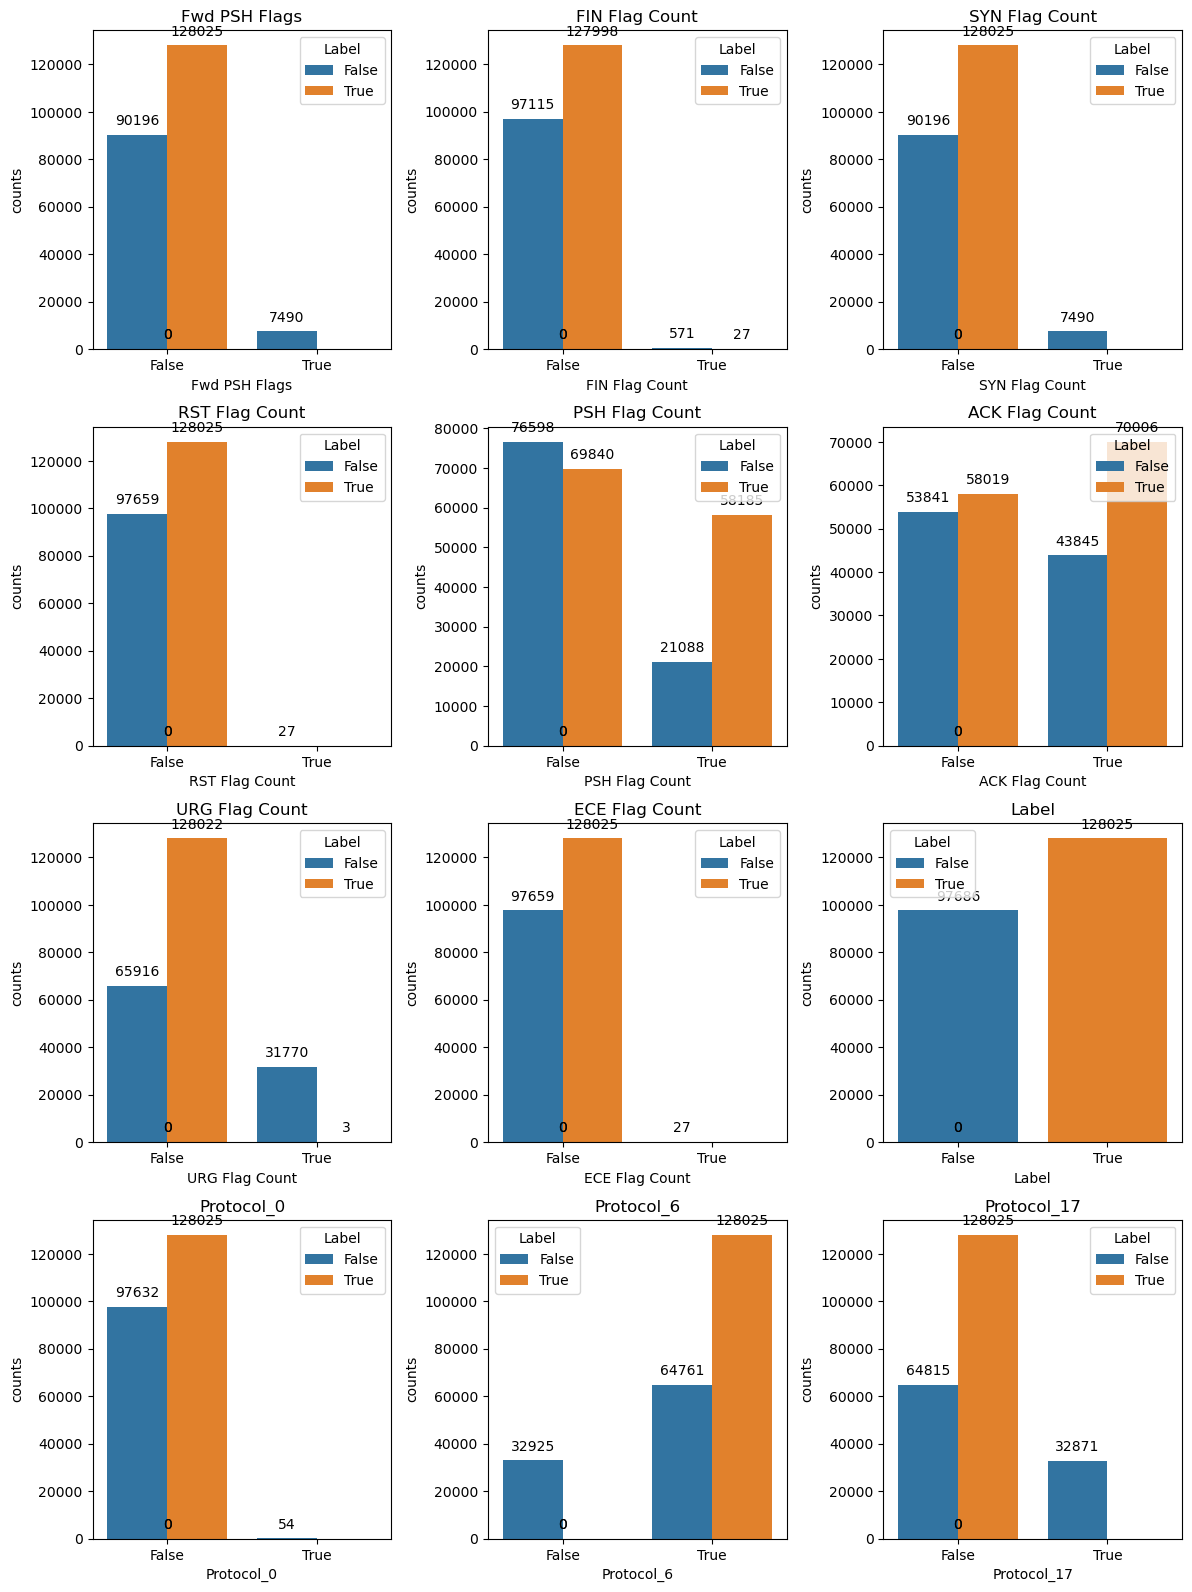

In [49]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnCount(df, nGraphShown, nGraphPerRow):
    df = df.select_dtypes('bool')
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = nGraphShown // nGraphPerRow + (1 if nGraphShown % nGraphPerRow else 0)

    # Set up the figure size dynamically based on the number of graphs
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow, figsize=(4 * nGraphPerRow, 4 * nGraphRow))
    graph_counter = 0
    for i in range(nGraphRow):
        for j in range(nGraphPerRow):
            ax[i,j] = sns.countplot(df, x=columnNames[graph_counter], hue='Label', ax=ax[i, j])
            ax[i,j].set_ylabel('counts')
            ax[i,j].set_title(f'{columnNames[graph_counter]}')
            for p in ax[i,j].patches:
                ax[i,j].annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')
            graph_counter += 1
            if graph_counter >= min(nGraphShown,nCol):
                break
        if graph_counter >= min(nGraphShown,nCol):
                break
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

number_of_columns = len(df1_analyze.select_dtypes('bool').columns)
plotPerColumnCount(df1_analyze, number_of_columns, 3)

In [17]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Checking if there is any significant dependency between categorical features with target
chi2_stats, p_values = chi2(df1_analyze.drop(columns=['Label']).select_dtypes('bool'), df1_analyze['Label'])
columns = df1_analyze.drop(columns=['Label']).select_dtypes('bool').columns
for i in range(len(columns)):
    print(f"{columns[i]}\t: p_value={p_values[i]}")

Fwd PSH Flags	: p_value=0.0
FIN Flag Count	: p_value=2.098426458812254e-146
SYN Flag Count	: p_value=0.0
RST Flag Count	: p_value=2.7048311032787678e-09
PSH Flag Count	: p_value=0.0
ACK Flag Count	: p_value=2.5298218044405928e-231
URG Flag Count	: p_value=0.0
ECE Flag Count	: p_value=2.7048311032787678e-09
Protocol_0	: p_value=4.0116187262167116e-17
Protocol_6	: p_value=0.0
Protocol_17	: p_value=0.0


Text(0, 0.5, 'Features')

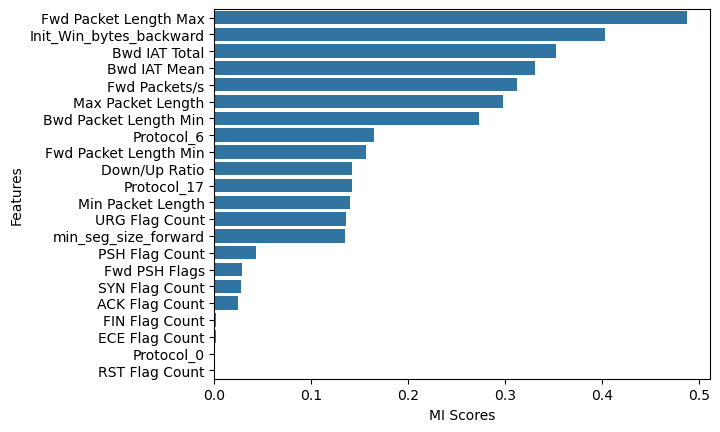

In [18]:
# Checking mutual information gain from features and target
mi_scores = mutual_info_classif(df1_analyze.drop(columns=['Label']), df1_analyze['Label'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df1_analyze.drop(columns=['Label']).columns)
mi_scores = mi_scores.sort_values(ascending=False)

sns.barplot(x=mi_scores, y=mi_scores.index)
plt.ylabel('Features')

In [3]:
# Tagging columns with the least information gain (Mostly due to close to zero variation in values)
columns_to_drop_3 = ['FIN Flag Count', 'RST Flag Count', 'ECE Flag Count']

## Start here for ease of training the model

In [ ]:
# Reassigning columns to drop for ease of use & Reloading data for ease of use ()
df=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.columns = df.columns.str.strip()  # Remove leading and trailing spaces|

df_one_values = ['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'CWE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

columns_to_drop = ['Active Mean',
 'Active Min',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Subflow Bwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Fwd Packets',
 'Total Backward Packets',
 'Total Fwd Packets',
 'Total Length of Bwd Packets',
 'Total Length of Fwd Packets',
 'act_data_pkt_fwd']

columns_to_drop_2 = ['Flow Bytes/s',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd Header Length',
 'Bwd Packets/s',
 'Init_Win_bytes_forward',
 'Active Std',
 'Active Max',
 'Idle Std']

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

### Creating Model

1. Create a pipeline that preprocess previous analysis
2. Run a standardization preprocessing + PCA (explaining 95% variance of data) for numerical columns
3. Run one hot encoding for Protocol column, and select K Best for the whole categorical columns with chi square as its scoring method
4. Run gridsearch with Random Forest and Logistic Regression

In [7]:
df1_analyze = df.drop(columns=['Source Port', 'Destination Port', 'Destination IP', 'Source IP', 'Flow ID', 'Fwd Header Length.1', 'Timestamp'])

# Drop any rows with nulls
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isnull().any(axis=1)].index)

# Drop any rows with infinity
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isin([np.inf, -np.inf]).any(axis=1)].index)

# Dropping columns with only 1 value
df1_analyze = df1_analyze.drop(columns=df_one_values)

# Dropping columns with high colinearity
df1_analyze = df1_analyze.drop(columns=columns_to_drop)

# Dropping columns that have low correlation with target
df1_analyze = df1_analyze.drop(columns=columns_to_drop_2)

# Dropping columns that have low mutual information gain with target
df1_analyze = df1_analyze.drop(columns=columns_to_drop_3)

# Change flags to boolean type
to_bool = []
for x in df1_analyze.columns:
    if "Flag" in x:
        to_bool.append(x)
df1_analyze[to_bool] = df1_analyze[to_bool].astype('bool')

# Changing Label to 0 and 1
df1_analyze['Label'] = df1_analyze['Label'].apply(lambda x: 1 if x == "DDoS" else 0)
df1_analyze['Label'] = df1_analyze['Label'].astype('bool')

df1_analyze.shape

(225711, 18)

In [8]:
# Splitting data for training and testing
train_friday, test_friday = train_test_split(df1_analyze, test_size=0.3, random_state=42)

X_train_friday = train_friday.drop(columns='Label')
y_train_friday = train_friday['Label']
X_test_friday = test_friday.drop(columns='Label')
y_test_friday = test_friday['Label']

categorical_column = X_train_friday.select_dtypes('bool').columns
numerical_columns = X_train_friday.select_dtypes('number').columns

#### Random Forest

In [ ]:
# Creating model pipeline
ohe = OneHotEncoder(handle_unknown="ignore")
pca = PCA(n_components=0.98)
selectk = SelectKBest(chi2, k=1)

numerical_pipeline = Pipeline([('standard_scaler', StandardScaler()), ('pca', pca)])

categorical_column_transformer = ColumnTransformer(
    [('one_hot_encoder', ohe, ['Protocol']),
     ('nothing', 'passthrough', categorical_column)]
)
categorical_pipeline = Pipeline([('cat_transformer', categorical_column_transformer), ('select_k', selectk)])

preprocessor = ColumnTransformer(
    [('cat_processing', categorical_pipeline, ['Protocol'] + list(categorical_column)),
     ('num_processing', numerical_pipeline, numerical_columns),]
)

estimator = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_split=0.1)

param_random = {
    'preprocessing__cat_processing__select_k__k':range(6),
    'prediction__max_depth': range(1, 20),
    'prediction__min_samples_split': stats.uniform(0.1, 0.4),
    'prediction__n_estimators': [100, 300, 500, 1000]
}

pipeline = Pipeline([('preprocessing', preprocessor), ('prediction', estimator)])

random_search = RandomizedSearchCV(pipeline, n_iter=20, param_distributions=param_random, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [28]:
random_search.fit(X_train_friday, y_train_friday)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_processing',
                                                                               Pipeline(steps=[('cat_transformer',
                                                                                                ColumnTransformer(transformers=[('one_hot_encoder',
                                                                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                                                                 ['Protocol']),
                                                                                                                                ('nothing',
                                                                                                                                 'passthrough',
                                                                                                                                 Index(['Fwd PSH Flags', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'UR...
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'prediction__max_depth': range(1, 20),
                                        'prediction__min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B0F7CFF40>,
                                        'prediction__n_estimators': [100, 300,
                                                                     500,
                                                                     1000],
                                        'preprocessing__cat_processing__select_k__k': range(0, 6)},
                   random_state=42, scoring='accuracy', verbose=2)

In [29]:
random_search.best_params_

{'prediction__max_depth': 19,
 'prediction__min_samples_split': 0.13998996632720118,
 'prediction__n_estimators': 500,
 'preprocessing__cat_processing__select_k__k': 4}

In [30]:
prediction = random_search.best_estimator_.predict(X_test_friday)
print(classification_report(y_test_friday, prediction))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     29321
        True       0.99      0.99      0.99     38393

    accuracy                           0.99     67714
   macro avg       0.99      0.99      0.99     67714
weighted avg       0.99      0.99      0.99     67714



Text(0.5, 1.0, 'Confusion Matrix')

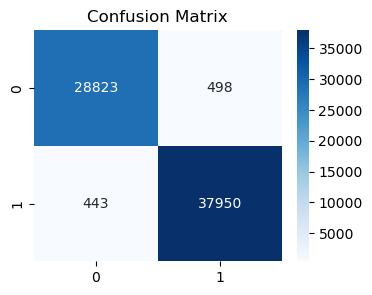

In [93]:
conf_mat = confusion_matrix(y_test_friday, prediction)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')

In [94]:
with open('model_1_rf_randomsearch.pkl', 'wb') as file:
    pickle.dump(random_search, file)

#### Decision Tree

In [ ]:
# Creating model pipeline
estimator = DecisionTreeClassifier(random_state=42, min_samples_split=0.1)

param_random = {
    'preprocessing__cat_processing__select_k__k':range(3),
    'prediction__max_depth': range(1, 5),
    'prediction__min_samples_split': stats.uniform(0.1, 0.4)  
}

pipeline = Pipeline([('preprocessing', preprocessor), ('prediction', estimator)])

random_search = RandomizedSearchCV(pipeline, param_distributions=param_random, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [97]:
random_search.fit(X_train_friday,y_train_friday)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_processing',
                                                                               Pipeline(steps=[('cat_transformer',
                                                                                                ColumnTransformer(transformers=[('one_hot_encoder',
                                                                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                                                                 ['Protocol']),
                                                                                                                                ('nothing',
                                                                                                                                 'passthrough',
                                                                                                                                 Index(['Fwd PSH Flags', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'UR...
                                             ('prediction',
                                              DecisionTreeClassifier(min_samples_split=0.1,
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'prediction__max_depth': range(1, 5),
                                        'prediction__min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000250A327E8B0>,
                                        'preprocessing__cat_processing__select_k__k': range(0, 3)},
                   random_state=42, scoring='accuracy', verbose=2)

In [98]:
random_search.best_params_

{'prediction__max_depth': 4,
 'prediction__min_samples_split': 0.1571467271687763,
 'preprocessing__cat_processing__select_k__k': 2}

              precision    recall  f1-score   support

       False       1.00      0.98      0.99     29321
        True       0.99      1.00      0.99     38393

    accuracy                           0.99     67714
   macro avg       0.99      0.99      0.99     67714
weighted avg       0.99      0.99      0.99     67714



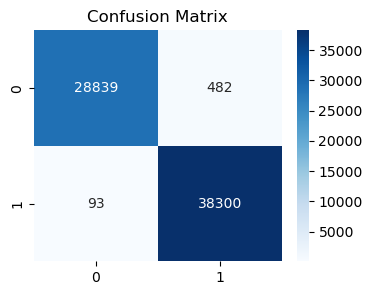

In [100]:
prediction = random_search.best_estimator_.predict(X_test_friday)
print(classification_report(y_test_friday, prediction))
conf_mat = confusion_matrix(y_test_friday, prediction)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [101]:
with open('model_1_dt_randomsearch.pkl', 'wb') as file:
    pickle.dump(random_search, file)

#### Logistic Regression

In [22]:
estimator = LogisticRegression(max_iter=3000, solver='saga', penalty='elasticnet', random_state=42)

param_random= {
    'preprocessing__cat_processing__select_k__k':range(5),
    'prediction__l1_ratio': stats.uniform(),
    'prediction__C': stats.loguniform(1e-3, 1e2)
}

pipeline = Pipeline([('preprocessing', preprocessor), ('prediction', estimator)])

random_search = RandomizedSearchCV(pipeline, n_iter=20, param_distributions=param_random, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [23]:
random_search.fit(X_train_friday,y_train_friday)

c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\feature_selection\_base.py:102: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_processing',
                                                                               Pipeline(steps=[('cat_transformer',
                                                                                                ColumnTransformer(transformers=[('one_hot_encoder',
                                                                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                                                                 ['Protocol']),
                                                                                                                                ('nothing',
                                                                                                                                 'passthrough',
                                                                                                                                 Index(['Fwd PSH Flags', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'UR...
                                                                 solver='saga'))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'prediction__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B0F57F640>,
                                        'prediction__l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B0F4FCDC0>,
                                        'preprocessing__cat_processing__select_k__k': range(0, 5)},
                   random_state=42, scoring='accuracy')

In [24]:
random_search.best_params_

{'prediction__C': 67.32248920775338,
 'prediction__l1_ratio': 0.8083973481164611,
 'preprocessing__cat_processing__select_k__k': 0}

c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\feature_selection\_base.py:102: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


              precision    recall  f1-score   support

       False       1.00      0.97      0.98     29321
        True       0.98      1.00      0.99     38393

    accuracy                           0.99     67714
   macro avg       0.99      0.98      0.99     67714
weighted avg       0.99      0.99      0.99     67714



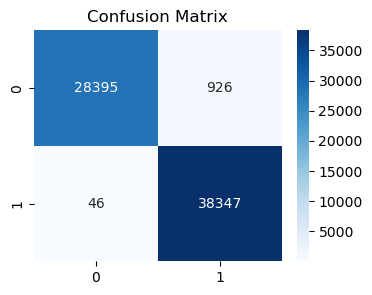

In [25]:
prediction = random_search.best_estimator_.predict(X_test_friday)
print(classification_report(y_test_friday, prediction))
conf_mat = confusion_matrix(y_test_friday, prediction)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [116]:
with open('model_1_logreg_randomsearch.pkl', 'wb') as file:
    pickle.dump(random_search, file)

#### XGBoost Tree Model

In [36]:
estimator = XGBClassifier(booster= 'gbtree', random_state=42)

param_random= {
    'preprocessing__cat_processing__select_k__k':range(5),
    'prediction__learning_rate': stats.loguniform(1e-4, 0.1),
    'prediction__max_depth': stats.randint(2, 20),
    'prediction__gamma': stats.loguniform(1e-8, 1)
}

pipeline = Pipeline([('preprocessing', preprocessor), ('prediction', estimator)])

random_search = RandomizedSearchCV(pipeline, n_iter=20, param_distributions=param_random, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [37]:
random_search.fit(X_train_friday,y_train_friday)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_processing',
                                                                               Pipeline(steps=[('cat_transformer',
                                                                                                ColumnTransformer(transformers=[('one_hot_encoder',
                                                                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                                                                 ['Protocol']),
                                                                                                                                ('nothing',
                                                                                                                                 'passthrough',
                                                                                                                                 Index(['Fwd PSH Flags', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'UR...
                   param_distributions={'prediction__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B389E5AF0>,
                                        'prediction__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B38A34A90>,
                                        'prediction__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014B3896FF40>,
                                        'preprocessing__cat_processing__select_k__k': range(0, 5)},
                   random_state=42, scoring='accuracy', verbose=2)

In [38]:
random_search.best_params_

{'prediction__gamma': 9.91564456663839e-06,
 'prediction__learning_rate': 0.07114476009343418,
 'prediction__max_depth': 12,
 'preprocessing__cat_processing__select_k__k': 4}

              precision    recall  f1-score   support

       False       1.00      0.99      0.99     29321
        True       0.99      1.00      0.99     38393

    accuracy                           0.99     67714
   macro avg       0.99      0.99      0.99     67714
weighted avg       0.99      0.99      0.99     67714



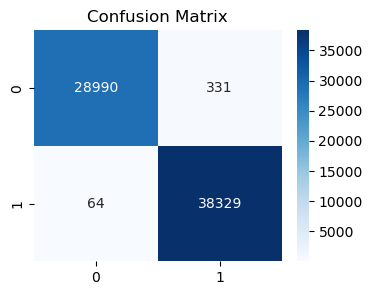

In [40]:
prediction = random_search.best_estimator_.predict(X_test_friday)
print(classification_report(y_test_friday, prediction))
conf_mat = confusion_matrix(y_test_friday, prediction)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [41]:
with open('model_1_xgb_randomsearch.pkl', 'wb') as file:
    pickle.dump(random_search, file)

### SVC Model

In [18]:
estimator = SVC(kernel='linear',gamma=10, C=100)

param_random= {
    'preprocessing__cat_processing__select_k__k':range(3),
    'prediction__kernel': ['linear', 'poly', 'rbf'],
    'prediction__gamma': stats.loguniform(0.1, 100),
    'prediction__C': stats.loguniform(1e-3, 1e2)
}

pipeline = Pipeline([('preprocessing', preprocessor), ('prediction', estimator)])

random_search = RandomizedSearchCV(pipeline, param_distributions=param_random, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [19]:
pipeline.fit(X_train_friday,y_train_friday)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_processing',
                                                  Pipeline(steps=[('cat_transformer',
                                                                   ColumnTransformer(transformers=[('one_hot_encoder',
                                                                                                    OneHotEncoder(handle_unknown='ignore'),
                                                                                                    ['Protocol']),
                                                                                                   ('nothing',
                                                                                                    'passthrough',
                                                                                                    Index(['Fwd PSH Flags', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count'],
      dtype='object'))])),
                                                                  (...
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.98))]),
                                                  Index(['Protocol', 'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Fwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Down/Up Ratio', 'Init_Win_bytes_backward', 'min_seg_size_forward'],
      dtype='object'))])),
                ('prediction', SVC(C=100, gamma=10, kernel='linear'))])

In [ ]:
random_search.best_params_

{'prediction__C': 7.915074397656213,
 'prediction__l1_ratio': 0.6371651421518383,
 'preprocessing__cat_processing__select_k__k': 1}

              precision    recall  f1-score   support

       False       1.00      0.98      0.99     29321
        True       0.98      1.00      0.99     38393

    accuracy                           0.99     67714
   macro avg       0.99      0.99      0.99     67714
weighted avg       0.99      0.99      0.99     67714



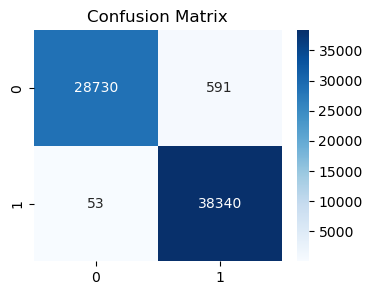

In [20]:
# prediction = random_search.best_estimator_.predict(X_test_friday)
prediction = pipeline.predict(X_test_friday)
print(classification_report(y_test_friday, prediction))
conf_mat = confusion_matrix(y_test_friday, prediction)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
with open('model_1_svc_randomsearch.pkl', 'wb') as file:
    pickle.dump(random_search, file)

#### XGBoost Linear

In [79]:
estimator = XGBClassifier(booster= 'gblinear', random_state=42)

param_random= {
    'preprocessing__cat_processing__select_k__k':range(10),
    'prediction__learning_rate': stats.loguniform(1e-4, 0.1),
    'prediction__reg_alpha': stats.loguniform(1e-8, 1),
    'prediction__reg_lambda': stats.loguniform(1e-8, 1)
}

pipeline = Pipeline([('preprocessing', preprocessor), ('prediction', estimator)])

random_search = RandomizedSearchCV(pipeline, n_iter=20, param_distributions=param_random, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

In [80]:
random_search.fit(X_train_friday,y_train_friday)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\an

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_processing',
                                                                               Pipeline(steps=[('cat_transformer',
                                                                                                ColumnTransformer(transformers=[('one_hot_encoder',
                                                                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                                                                 ['Protocol']),
                                                                                                                                ('nothing',
                                                                                                                                 'passthrough',
                                                                                                                                 Index(['Fwd PSH Flags', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'UR...
                   param_distributions={'prediction__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B72C67A00>,
                                        'prediction__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B72C54A60>,
                                        'prediction__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014B7BD40E20>,
                                        'preprocessing__cat_processing__select_k__k': range(0, 10)},
                   random_state=42, scoring='accuracy', verbose=2)

In [81]:
random_search.best_params_

{'prediction__learning_rate': 0.07866216981266842,
 'prediction__reg_alpha': 0.0007182472659393415,
 'prediction__reg_lambda': 1.6143342323367594e-06,
 'preprocessing__cat_processing__select_k__k': 0}

c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\feature_selection\_base.py:102: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


              precision    recall  f1-score   support

       False       1.00      0.89      0.94     29321
        True       0.92      1.00      0.96     38393

    accuracy                           0.95     67714
   macro avg       0.96      0.94      0.95     67714
weighted avg       0.95      0.95      0.95     67714



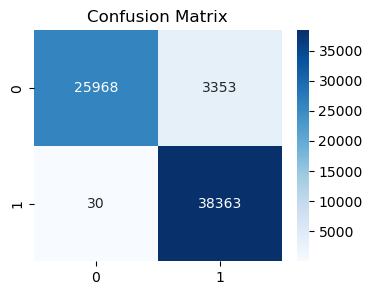

In [82]:
prediction = random_search.best_estimator_.predict(X_test_friday)
print(classification_report(y_test_friday, prediction))
conf_mat = confusion_matrix(y_test_friday, prediction)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [83]:
with open('model_1_xgblinear_randomsearch.pkl', 'wb') as file:
    pickle.dump(random_search, file)

# Combining Model 1 & 2

In [ ]:
with open('model_1_rf_randomsearch.pkl', 'rb') as file:
    model_1 = pickle.load(file)

with open('model_2_rf_randomsearch.pkl', 'rb') as file:
    model_2 = pickle.load(file)

def ddos_predictor(X: pd.DataFrame) -> pd.DataFrame:
    prediction_1 = model_1.predict(X)
    prediction_2 = model_2.predict(X)
    for i in range(len(prediction_1)):
        if not prediction_1[i]:
            prediction_2[i] = 0
    return prediction_2

array([False])

# Testing the model on another dataset (CIC 2019)

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Reading the file
cic_df=pd.read_csv('cicddos2019_dataset.csv', index_col=0)

# Renaming columns to match the model
rename_column =  {'Packet Length Max': 'Max Packet Length',
                  'Init Fwd Win Bytes':'Init_Win_bytes_forward',
                  'Bwd Packets Length Total':'Total Length of Bwd Packets',
                  'Packet Length Min':'Min Packet Length',
                  'Fwd Seg Size Min':'min_seg_size_forward',
                  'Fwd Act Data Packets':'act_data_pkt_fwd',
                  'Avg Packet Size':'Average Packet Size',
                  'Init Bwd Win Bytes':'Init_Win_bytes_backward',
                  'Fwd Packets Length Total':'Total Length of Fwd Packets'
                }
cic_df = cic_df.rename(columns=rename_column)
cic_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [6]:
# Drop any rows with nulls
cic_df = cic_df.drop(index=cic_df[cic_df.isnull().any(axis=1)].index)

# Drop any rows with infinity
cic_df = cic_df.drop(index=cic_df[cic_df.isin([np.inf, -np.inf]).any(axis=1)].index)

# Change flags to boolean type
to_bool = []
for x in cic_df.columns:
    if "Flag" in x:
        to_bool.append(x)
cic_df[to_bool] = cic_df[to_bool].astype('bool')

# Changing Label to 0 and 1
cic_df['Label'] = cic_df['Label'].apply(lambda x: 0 if x == "Benign" else 1)
cic_df['Label'] = cic_df['Label'].astype('bool')

# Separating features from target
X_cic = cic_df.drop(columns=['Label','Class'])
y_cic = cic_df['Label']

#### Random Forest Model

              precision    recall  f1-score   support

       False       0.23      0.99      0.37     97831
        True       0.93      0.03      0.05    333540

    accuracy                           0.25    431371
   macro avg       0.58      0.51      0.21    431371
weighted avg       0.77      0.25      0.13    431371



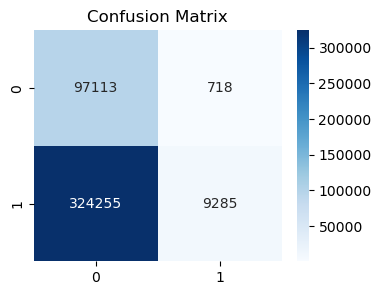

In [53]:
with open('model_1_rf_randomsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

#### Decision Tree Model

              precision    recall  f1-score   support

       False       0.24      0.99      0.38     97831
        True       0.97      0.06      0.11    333540

    accuracy                           0.27    431371
   macro avg       0.60      0.53      0.25    431371
weighted avg       0.80      0.27      0.17    431371



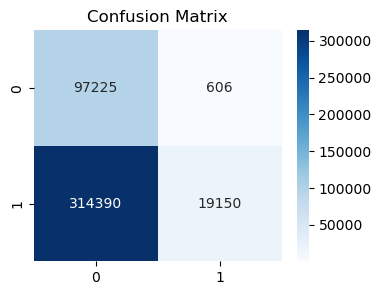

In [54]:
with open('model_1_dt_randomsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [9]:
import pickle
with open('model_1_dt_gridsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

/home/ecs-user/is5126/final-project/.venv/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.24      0.99      0.38     97831
        True       0.97      0.06      0.11    333540

    accuracy                           0.27    431371
   macro avg       0.60      0.53      0.25    431371
weighted avg       0.80      0.27      0.17    431371



NameError: name 'plt' is not defined

#### Logistic Regression Model

              precision    recall  f1-score   support

       False       0.41      0.97      0.58     97831
        True       0.98      0.60      0.74    333540

    accuracy                           0.68    431371
   macro avg       0.70      0.78      0.66    431371
weighted avg       0.85      0.68      0.71    431371



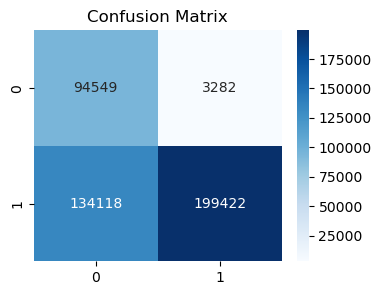

In [51]:
with open('model_1_logreg_randomsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [34]:
loaded_model_pickle.best_params_

{'prediction__C': 7.915074397656213,
 'prediction__l1_ratio': 0.6371651421518383,
 'preprocessing__cat_processing__select_k__k': 1}

#### XGBoost Tree

              precision    recall  f1-score   support

       False       0.24      1.00      0.38     97831
        True       0.98      0.06      0.10    333540

    accuracy                           0.27    431371
   macro avg       0.61      0.53      0.24    431371
weighted avg       0.81      0.27      0.17    431371



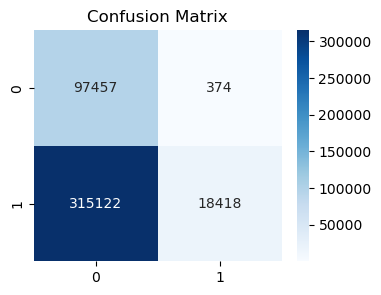

In [52]:
with open('model_1_xgb_randomsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

c:\anaconda\envs\deeplearning\lib\site-packages\sklearn\feature_selection\_base.py:102: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.22      0.81      0.34     97831
        True       0.72      0.15      0.25    333540

    accuracy                           0.30    431371
   macro avg       0.47      0.48      0.29    431371
weighted avg       0.61      0.30      0.27    431371



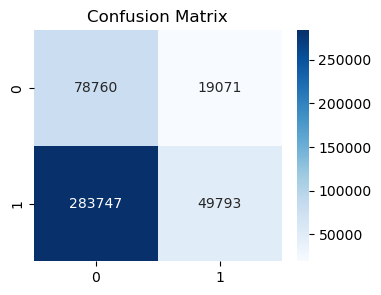

In [84]:
with open('model_1_xgblinear_randomsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()